In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
reviews = pd.read_csv('reviews.csv')
df_r = reviews.copy()
df_r.head(3)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


In [3]:
products = pd.read_csv('E:/DataScience/Phyton/ml/NLP/GreatLearning/product_data.csv')
df_p = products.copy()
df_p.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0


In [4]:
df_r.shape, df_p.shape

((67986, 8), (720, 10))

In [5]:
print('Reveiws')
df_r.info()
print()
print('Products')
df_p.info()

Reveiws
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB

Products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4  

In [6]:
df_r.drop(columns =['name', 'date', 'verified', 'helpfulVotes'], inplace =True)
df_p.drop(columns =['title', 'url', 'image', 'rating', 'reviewUrl','totalReviews', 'price', 'originalPrice'],
         inplace =True)
print(df_r.columns)
print(df_p.columns)

Index(['asin', 'rating', 'title', 'body'], dtype='object')
Index(['asin', 'brand'], dtype='object')


In [7]:
print(df_r.isna().sum(), df_p.isna().sum())
print()
df_r = df_r.dropna()
df_p = df_p.dropna()
print(df_r.isna().sum(), df_p.isna().sum())

asin       0
rating     0
title     14
body      21
dtype: int64 asin     0
brand    4
dtype: int64

asin      0
rating    0
title     0
body      0
dtype: int64 asin     0
brand    0
dtype: int64


In [8]:
# Merging both the tables on key ‘asin’
df = df_r.merge(df_p, left_on='asin', right_on='asin')
df.head()

,asin,rating,title,body,brand
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola


In [9]:
df['rating'].describe()

count    67756.000000
mean         3.807840
std          1.583129
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='count'>

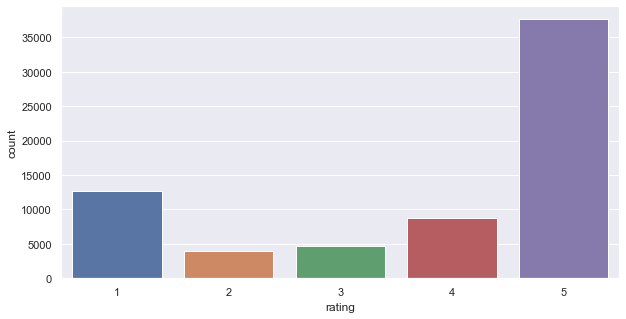

In [10]:
# 2.4 Visualize a countplot for rating and share insights
plt.figure(figsize=(10,5))
sns.countplot(x=df["rating"])

<AxesSubplot:xlabel='brand', ylabel='count'>

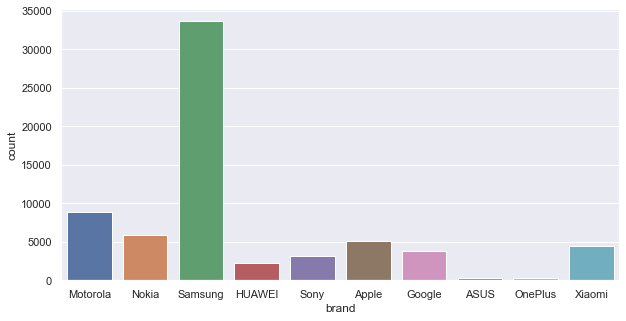

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["brand"])

<AxesSubplot:xlabel='rating', ylabel='count'>

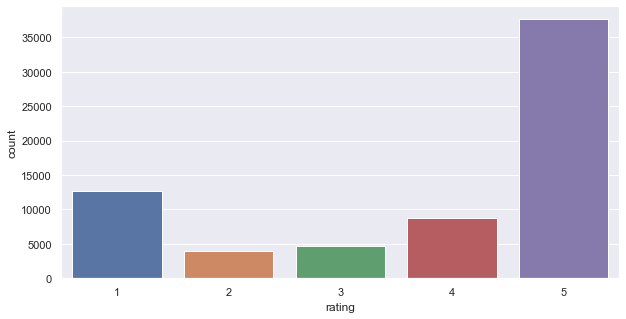

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["rating"])

In [13]:
# Mapping ‘Sentiment’ and Assign Sentiment= 1 when Rating >3; Sentiment= -1 when Rating <3 and Sentiment= 0 when rating = 3.
target_map = { 4:1,5:1, 3:0, 1:-1,2:-1}
df['sentiment'] = df['rating'].map(target_map)
df.head()

,asin,rating,title,body,brand,sentiment
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,-1
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,-1
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

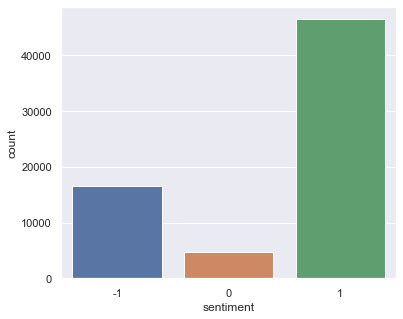

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x=df["sentiment"])

In [15]:
pd.crosstab(df.sentiment, df.brand)

brand,ASUS,Apple,Google,HUAWEI,Motorola,Nokia,OnePlus,Samsung,Sony,Xiaomi
sentiment,,,,,,,,,,
-1,64,1434,1168,309,2104,1710,52,8531,770,460
0,25,322,267,124,653,540,13,2292,280,222
1,162,3388,2351,1792,6122,3664,282,22781,2145,3729


<AxesSubplot:xlabel='sentiment', ylabel='count'>

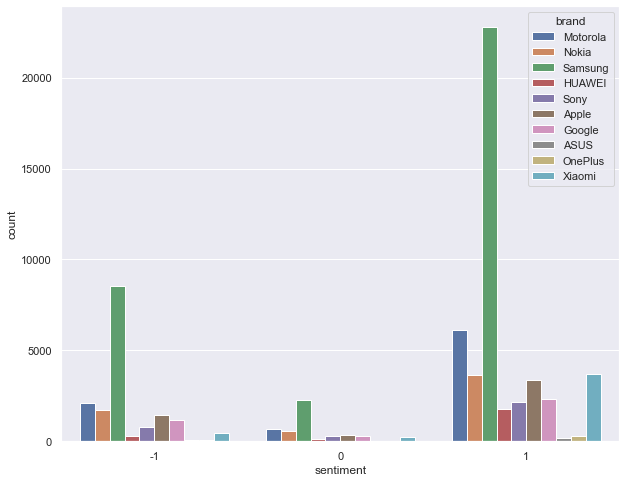

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="sentiment", hue="brand")

In [17]:
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()
df.head()

,asin,rating,title,body,brand,sentiment
0,B0009N5L7K,1,stupid phone,don't buy out of service,Motorola,-1
1,B0009N5L7K,4,exellent service,i have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,i love it,"i just got it and have to say its easy to use,...",Motorola,1
3,B0009N5L7K,1,phones locked,1 star because the phones locked so i have to ...,Motorola,-1
4,B0009N5L7K,5,excellent product,the product has been very good. i had used thi...,Motorola,1


In [18]:
# Removing all punctuations
def remove_punctuations(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [19]:
df['body'] = df['body'].apply(remove_punctuations)
df['title'] = df['title'].apply(remove_punctuations)
df.head()

,asin,rating,title,body,brand,sentiment
0,B0009N5L7K,1,stupid phone,dont buy out of service,Motorola,-1
1,B0009N5L7K,4,exellent service,i have been with nextel for nearly a year now ...,Motorola,1
2,B0009N5L7K,5,i love it,i just got it and have to say its easy to use ...,Motorola,1
3,B0009N5L7K,1,phones locked,1 star because the phones locked so i have to ...,Motorola,-1
4,B0009N5L7K,5,excellent product,the product has been very good i had used this...,Motorola,1


In [20]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patience\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(text):
    r_text = ''
    for item in text.split():
        if item not in stop:
            r_text = r_text + ' ' + item
    return r_text.strip()

In [22]:
remove_stopwords(df.iloc[0,3])

'dont buy service'

In [23]:
df['body'] = df['body'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)
df.head()

,asin,rating,title,body,brand,sentiment
0,B0009N5L7K,1,stupid phone,dont buy service,Motorola,-1
1,B0009N5L7K,4,exellent service,nextel nearly year started time last year moto...,Motorola,1
2,B0009N5L7K,5,love,got say easy use hear person talking fine prob...,Motorola,1
3,B0009N5L7K,1,phones locked,1 star phones locked pay additional fees unlock,Motorola,-1
4,B0009N5L7K,5,excellent product,product good used cell phone one projects work...,Motorola,1


In [24]:
#TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features= 2000)
transformed_data = vectorizer.fit_transform(df['body'])
transformed_data

<67756x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1338539 stored elements in Compressed Sparse Row format>

In [25]:
X = transformed_data
Y = df['sentiment']

In [27]:
#Splitting data 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size =0.2, stratify = Y, random_state = 12)
Ytrain.value_counts(normalize= True), Ytest.value_counts(normalize= True)

( 1    0.685042
 -1    0.245037
  0    0.069921
 Name: sentiment, dtype: float64,
  1    0.685065
 -1    0.244982
  0    0.069953
 Name: sentiment, dtype: float64)

In [28]:
# Build a Classification model to predict sentiment 
model = MultinomialNB()
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [29]:
#Accuracy score for train and test data both 
print('Training Score:', model.score(Xtrain, Ytrain))
print('Test Score:', model.score(Xtest, Ytest))

Training Score: 0.8324477898310088
Test Score: 0.8321280991735537
